In [1]:
import pandas as pd
from os import listdir

In [2]:
filenames = listdir('CMIP6_tas_landsea')

In [3]:
res = map(lambda x: x.split('_'), filenames)

In [4]:
scenarios = ['historical', 'ssp126', 'ssp245', 'ssp370', 'ssp585']

In [5]:
filename = [file for file in listdir('CMIP6_tas_landsea') if ('EC-Earth3' in file.split('_')) and ('ssp126' in file) ]

In [6]:
print(filename)

['CMIP6_EC-Earth3_ssp126_r1i1p1f1.csv']


In [7]:
def get_model_name(filename):
    return filename.split('_')[1]

In [8]:
print(get_model_name('CMIP6_HadGEM3-GC31-LL_ssp245_r1i1p1f3.csv'))

HadGEM3-GC31-LL


In [9]:
def scenario_df(scenario):
    frames = []
    filenames = [file for file in listdir('CMIP6_tas_landsea') if scenario in file]
    for file in filenames:
        model_name = get_model_name(file)
        df = pd.read_csv('CMIP6_tas_landsea/' + file, header=15, usecols=['date', 'world'])
        df['scenario'] = scenario
        df['model'] = model_name
        frames.append(df)
    return pd.concat(frames, ignore_index=True)
    


In [10]:
ssp126 = scenario_df('ssp126')
ssp245 = scenario_df('ssp245')
ssp370 = scenario_df('ssp370')
ssp585 = scenario_df('ssp585')

In [11]:
def dateify_proj(frames):
    for frame in frames:
        frame['date'] = pd.to_datetime(frame['date'], format='%Y-%m')
all_scenarios = [ssp126, ssp245, ssp370, ssp585]
dateify_proj(all_scenarios)

In [12]:
bins = [2021, 2041, 2061, 2081, 2101]
labels = ['2021-2040', '2041-2060', '2061-2080', '2081-2100']
models = ['UKESM1-0-LL', 'CMCC-CM2-SR5', 'MPI-ESM1-2-HR', 'NorESM2-MM', 'INM-CM4-8',
 'ACCESS-ESM1-5', 'CNRM-CM6-1', 'MRI-ESM2-0', 'NESM3', 'CESM2', 'ACCESS-CM2',
 'MPI-ESM1-2-LR', 'EC-Earth3-Veg', 'IITM-ESM', 'MIROC6', 'BCC-CSM2-MR',
 'INM-CM5-0', 'AWI-CM-1-1-MR', 'FGOALS-g3', 'EC-Earth3', 'NorESM2-LM',
 'GFDL-ESM4', 'KACE-1-0-G', 'CNRM-ESM2-1', 'MIROC-ES2L', 'CAMS-CSM1-0',
 'CanESM5', 'IPSL-CM6A-LR', 'CNRM-CM6-1-HR', 'HadGEM3-GC31-LL', 'KIOST-ESM',
 'CESM2-WACCM']


In [13]:
def groups_20_year(frame):
    frame['period'] = pd.cut(frame['date'].dt.year, bins=bins, labels=labels, right=False)
    return frame.groupby(['scenario', 'model', 'period'])['world'].mean().reset_index()


In [14]:
ssp126Avgs = groups_20_year(ssp126).round(2)
ssp245Avgs = groups_20_year(ssp245).round(2)
ssp370Avgs = groups_20_year(ssp370).round(2)
ssp585Avgs = groups_20_year(ssp585).round(2)

In [15]:
[ssp126Avgs, ssp245Avgs, ssp370Avgs, ssp585Avgs]

[    scenario          model     period  world
 0     ssp126     ACCESS-CM2  2021-2040  15.39
 1     ssp126     ACCESS-CM2  2041-2060  15.99
 2     ssp126     ACCESS-CM2  2061-2080  16.20
 3     ssp126     ACCESS-CM2  2081-2100  16.27
 4     ssp126  ACCESS-ESM1-5  2021-2040  16.02
 ..       ...            ...        ...    ...
 123   ssp126     NorESM2-MM  2081-2100  15.22
 124   ssp126    UKESM1-0-LL  2021-2040  15.20
 125   ssp126    UKESM1-0-LL  2041-2060  15.76
 126   ssp126    UKESM1-0-LL  2061-2080  15.97
 127   ssp126    UKESM1-0-LL  2081-2100  16.06
 
 [128 rows x 4 columns],
     scenario          model     period  world
 0     ssp245     ACCESS-CM2  2021-2040  15.37
 1     ssp245     ACCESS-CM2  2041-2060  16.18
 2     ssp245     ACCESS-CM2  2061-2080  16.76
 3     ssp245     ACCESS-CM2  2081-2100  17.18
 4     ssp245  ACCESS-ESM1-5  2021-2040  16.06
 ..       ...            ...        ...    ...
 131   ssp245     NorESM2-MM  2081-2100  16.00
 132   ssp245    UKESM1-0-LL  202

In [16]:
ssp126

,date,world,scenario,model,period
0,2015-01-01,11.960,ssp126,INM-CM4-8,NaN
1,2015-02-01,12.222,ssp126,INM-CM4-8,NaN
2,2015-03-01,13.245,ssp126,INM-CM4-8,NaN
3,2015-04-01,14.327,ssp126,INM-CM4-8,NaN
4,2015-05-01,15.440,ssp126,INM-CM4-8,NaN
...,...,...,...,...,...
32995,2100-08-01,16.975,ssp126,CNRM-CM6-1,2081-2100
32996,2100-09-01,16.051,ssp126,CNRM-CM6-1,2081-2100
32997,2100-10-01,15.038,ssp126,CNRM-CM6-1,2081-2100
32998,2100-11-01,13.901,ssp126,CNRM-CM6-1,2081-2100


In [17]:
historical = scenario_df('historical').round(2)

In [18]:
historical

,date,world,scenario,model
0,1850-01,10.56,historical,CNRM-CM6-1-HR
1,1850-02,10.97,historical,CNRM-CM6-1-HR
2,1850-03,11.47,historical,CNRM-CM6-1-HR
3,1850-04,12.28,historical,CNRM-CM6-1-HR
4,1850-05,13.18,historical,CNRM-CM6-1-HR
...,...,...,...,...
60475,2014-08,15.35,historical,KIOST-ESM
60476,2014-09,14.87,historical,KIOST-ESM
60477,2014-10,13.78,historical,KIOST-ESM
60478,2014-11,12.80,historical,KIOST-ESM


In [19]:
historical_bins = [1850, 1900]
historical_label = ['1850-1900']
historical['date'] = historical['date'] = pd.to_datetime(historical['date'], format='%Y-%m')
historical['period'] = pd.cut(historical['date'].dt.year, bins=historical_bins, labels=historical_label, right=False)
historicalAvgs = historical.groupby(['scenario', 'model', 'period'])['world'].median().reset_index()

In [20]:
historicalAvgs

,scenario,model,period,world
0,historical,ACCESS-CM2,1850-1900,13.835
1,historical,ACCESS-ESM1-5,1850-1900,14.540
2,historical,AWI-CM-1-1-MR,1850-1900,13.755
3,historical,BCC-CSM2-MR,1850-1900,14.820
4,historical,CAMS-CSM1-0,1850-1900,13.795
5,historical,CESM2,1850-1900,14.020
6,historical,CESM2-WACCM,1850-1900,13.835
7,historical,CMCC-CM2-SR5,1850-1900,14.105
8,historical,CNRM-CM6-1,1850-1900,12.880
9,historical,CNRM-CM6-1-HR,1850-1900,12.325


In [21]:
ssp126merged = pd.merge(ssp126Avgs, historicalAvgs[['model', 'world']], on='model', suffixes=('', '_historical'))
ssp245merged = pd.merge(ssp245Avgs, historicalAvgs[['model', 'world']], on='model', suffixes=('', '_historical'))
ssp370merged = pd.merge(ssp370Avgs, historicalAvgs[['model', 'world']], on='model', suffixes=('', '_historical'))
ssp585merged = pd.merge(ssp585Avgs, historicalAvgs[['model', 'world']], on='model', suffixes=('', '_historical'))


In [22]:
def collect_changes(frame):
    frame['changed'] = frame['world'] - frame['world_historical'] - 0.25
    return frame.drop(columns=['world_historical'])
mergeds = [ssp126merged, ssp245merged, ssp370merged, ssp585merged]

changeds = map(collect_changes, mergeds)

In [ ]:
for frame in changeds:
    print(frame)

    scenario          model     period  world  changed
0     ssp126     ACCESS-CM2  2021-2040  15.39    1.305
1     ssp126     ACCESS-CM2  2041-2060  15.99    1.905
2     ssp126     ACCESS-CM2  2061-2080  16.20    2.115
3     ssp126     ACCESS-CM2  2081-2100  16.27    2.185
4     ssp126  ACCESS-ESM1-5  2021-2040  16.02    1.230
..       ...            ...        ...    ...      ...
123   ssp126     NorESM2-MM  2081-2100  15.22    1.050
124   ssp126    UKESM1-0-LL  2021-2040  15.20    1.500
125   ssp126    UKESM1-0-LL  2041-2060  15.76    2.060
126   ssp126    UKESM1-0-LL  2061-2080  15.97    2.270
127   ssp126    UKESM1-0-LL  2081-2100  16.06    2.360

[128 rows x 5 columns]
    scenario          model     period  world  changed
0     ssp245     ACCESS-CM2  2021-2040  15.37    1.285
1     ssp245     ACCESS-CM2  2041-2060  16.18    2.095
2     ssp245     ACCESS-CM2  2061-2080  16.76    2.675
3     ssp245     ACCESS-CM2  2081-2100  17.18    3.095
4     ssp245  ACCESS-ESM1-5  2021-2040  1

In [24]:
import matplotlib.pyplot as plt

In [25]:
periods = ['2021-2040', '2041-2060', '2061-2080', '2081-2100']

def plot_hists(frame):
    scenario = frame['scenario'][0]
    for period in periods:
        plt.figure(figsize=(8, 6))
        period_data = frame[frame['period'] == period]
        n, bins, patches = plt.hist(period_data['changed'], bins=10, edgecolor='black', alpha=0.7, density=True)
        plt.title('Distribution of predicted changes for scenario ' + scenario + ' during ' + period, fontsize=14)
        bin_labels = [f"{bins[i]:.1f}" for i in range(len(bins))]
        plt.xticks(bins, bin_labels, rotation=45)
        plt.xlabel('Amount of change', fontsize=10)
        plt.ylabel('Density', fontsize=10)
        plt.show()

In [26]:
import numpy as np

ssp126merged['changed']

0      1.305
1      1.905
2      2.115
3      2.185
4      1.230
       ...  
123    1.050
124    1.500
125    2.060
126    2.270
127    2.360
Name: changed, Length: 128, dtype: float64

In [27]:
methods = ['inverted_cdf','averaged_inverted_cdf','closest_observation','interpolated_inverted_cdf','hazen','weibull','linear','median_unbiased', 'normal_unbiased']
period = '2081-2100'
for method in methods:
    print("Method: " + method)
    print("ssp126")
    print(np.percentile(ssp126merged[ssp126merged['period'] == period]['changed'], [5, 50, 95], axis=None, method=method))
    print("ssp245")
    print(np.percentile(ssp245merged[ssp245merged['period'] == period]['changed'], [5, 50, 95], axis=None, method=method))
    print("ssp370")
    print(np.percentile(ssp370merged[ssp370merged['period'] == period]['changed'], [5, 50, 95], axis=None, method=method))
    print("ssp585")
    print(np.percentile(ssp585merged[ssp585merged['period'] == period]['changed'], [5, 50, 95], axis=None, method=method))
ssp126merged[ssp126merged['period'] == '2081-2100']['changed'].mean()

Method: inverted_cdf
ssp126
[1.05  1.715 2.605]
ssp245
[1.83  2.665 3.69 ]
ssp370
[2.615 3.68  5.16 ]
ssp585
[3.39  4.415 6.2  ]
Method: averaged_inverted_cdf
ssp126
[1.05  1.72  2.605]
ssp245
[1.83 2.67 3.69]
ssp370
[2.615  3.6875 5.16  ]
ssp585
[3.39 4.44 6.2 ]
Method: closest_observation
ssp126
[1.05  1.715 2.545]
ssp245
[1.83  2.665 3.625]
ssp370
[2.465 3.68  5.16 ]
ssp585
[3.39  4.415 5.85 ]
Method: interpolated_inverted_cdf
ssp126
[1.032 1.715 2.569]
ssp245
[1.8195 2.665  3.6445]
ssp370
[2.54 3.68 4.92]
ssp585
[3.2475 4.415  5.955 ]
Method: hazen
ssp126
[1.0525 1.72   2.599 ]
ssp245
[1.831 2.67  3.677]
ssp370
[2.615  3.6875 5.16  ]
ssp585
[3.391 4.44  6.13 ]
Method: weibull
ssp126
[1.03425 1.72    2.62775]
ssp245
[1.82125 2.67    3.75375]
ssp370
[2.5475  3.6875  5.38725]
ssp585
[3.27125 4.44    6.33625]
Method: linear
ssp126
[1.06375 1.72    2.572  ]
ssp245
[1.83325 2.67    3.64775]
ssp370
[2.66675 3.6875  4.944  ]
ssp585
[3.39325 4.44    5.9725 ]
Method: median_unbiased
ssp126
[

1.72578125

In [28]:
import math
def comppercentile(arr, p):
    sorted = np.sort(arr)
    rank = ((p/100) * (len(arr)-1))+1
    print("Rank: " + str(rank))
    if rank == math.floor(rank):
        return arr.iloc[rank]
    else:
        print("Interpolating: ")
        x1 = math.floor(rank)
        x2 = math.ceil(rank)
        return arr.iloc[x1] + (rank - math.floor(rank))*(arr.iloc[x2] - arr.iloc[x1])

for period in periods:
    print(comppercentile(ssp245merged[ssp245merged['period'] == period]['changed'], 50))
        

Rank: 17.5
Interpolating: 
1.237499999999999
Rank: 17.5
Interpolating: 
1.7574999999999985
Rank: 17.5
Interpolating: 
2.277499999999999
Rank: 17.5
Interpolating: 
2.6825


In [29]:
def likelihood_of_two(arr):
    bigger = [x for x in arr if x >= 2]
    return len(bigger)/len(arr)
len(ssp245merged[ssp245merged['period'] == '2081-2100']['changed'])
filtered = [x for x in (ssp245merged[ssp245merged['period'] == '2081-2100']['changed']) if x >= 2]

In [30]:
print(ssp126merged.keys())
ssp126merged.loc[ssp126merged['period'] == '2081-2100'].drop('scenario', axis=1).round(2)

Index(['scenario', 'model', 'period', 'world', 'world_historical', 'changed'], dtype='object')


,model,period,world,world_historical,changed
3,ACCESS-CM2,2081-2100,16.27,13.84,2.18
7,ACCESS-ESM1-5,2081-2100,16.54,14.54,1.75
11,AWI-CM-1-1-MR,2081-2100,15.72,13.76,1.72
15,BCC-CSM2-MR,2081-2100,16.29,14.82,1.22
19,CAMS-CSM1-0,2081-2100,15.13,13.80,1.09
23,CESM2,2081-2100,16.21,14.02,1.94
27,CESM2-WACCM,2081-2100,16.23,13.84,2.14
31,CMCC-CM2-SR5,2081-2100,16.87,14.10,2.52
35,CNRM-CM6-1,2081-2100,15.00,12.88,1.87
39,CNRM-CM6-1-HR,2081-2100,15.12,12.32,2.54


In [36]:
import re

for period in periods:
    with open('../promptExecutor/fluid/example/text-viz/datasets/ssp126-' + period + '.fld', 'w') as text_file:
        text_file.write(re.sub(r'"([^"]+)":', r'\1: ', ssp126merged.loc[ssp126merged['period']==period].sort_values(by=['changed']).drop(['scenario', 'period', 'model', 'world_historical', 'world'], axis=1).round(2).to_json(orient='records', indent=2)))
    with open('../promptExecutor/fluid/example/text-viz/datasets/ssp245-' + period + '.fld', 'w') as text_file:
        text_file.write(re.sub(r'"([^"]+)":', r'\1: ', ssp245merged.loc[ssp245merged['period']==period].sort_values(by=['changed']).drop(['scenario', 'period', 'model', 'world_historical', 'world'], axis=1).round(2).to_json(orient='records', indent=2)))
    with open('../promptExecutor/fluid/example/text-viz/datasets/ssp370-' + period + '.fld', 'w') as text_file:
        text_file.write(re.sub(r'"([^"]+)":', r'\1: ', ssp370merged.loc[ssp370merged['period']==period].sort_values(by=['changed']).drop(['scenario', 'period', 'model', 'world_historical', 'world'], axis=1).round(2).to_json(orient='records', indent=2)))
    with open('../promptExecutor/fluid/example/text-viz/datasets/ssp585-' + period + '.fld', 'w') as text_file:
        text_file.write(re.sub(r'"([^"]+)":', r'\1: ', ssp585merged.loc[ssp585merged['period']==period].sort_values(by=['changed']).drop(['scenario', 'period', 'model', 'world_historical', 'world'], axis=1).round(2).to_json(orient='records', indent=2)))


In [32]:
preds = ssp126merged.loc[ssp126merged['period'] == '2081-2100']['changed']
(preds.max() - preds.min()) / 8

0.20812499999999967

<Axes: >

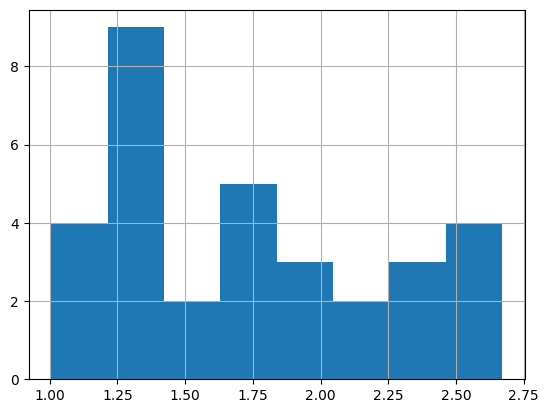

In [33]:
ssp126merged[ssp126merged['period'] == '2081-2100']['changed'].hist(bins=8)

In [34]:
print(periods)

['2021-2040', '2041-2060', '2061-2080', '2081-2100']
